## CSHO17 - Big Data Mining

### Assignment - 1

Name: Haemanth V<br>
Roll: 106119043<br>
Class: CSE-A<br>

### Imports

In [2]:
from collections import defaultdict
import itertools as it

### Creating the text file with all baskets

We create the textfile with details of all the transactions(the dataset to be used)

In [3]:
%%writefile transactions.txt
{Cat, and, dog, bites}
{Yahoo, news, claims, a, cat, mated, with, a, dog, and, produced, viable, offspring}
{Cat, killer, likely, is, a, and, big, dog}
{Professional, free, advice, on, dog, training, puppy, training}
{Cat,and, kitten, training, and, behavior}
{Dog, &, Cat, provides, dog, training, in, Eugene, Oregon}
{“Dog, and, cat”, is, a, slang, term, used, by, police, officers, for, a, male–female, relationship]
{Shop, for, your, show, dog, grooming, and, pet, cat, supplies}

Overwriting transactions.txt


### Representing the dataset as a 2D list 
Done for convenience in accessing individual items in a basket

In [4]:
# read the set of transactions(dataset) from the file
baskets = open("transactions.txt", encoding="utf8").readlines()
print(baskets)

['{Cat, and, dog, bites}\n', '{Yahoo, news, claims, a, cat, mated, with, a, dog, and, produced, viable, offspring}\n', '{Cat, killer, likely, is, a, and, big, dog}\n', '{Professional, free, advice, on, dog, training, puppy, training}\n', '{Cat,and, kitten, training, and, behavior}\n', '{Dog, &, Cat, provides, dog, training, in, Eugene, Oregon}\n', '{“Dog, and, cat”, is, a, slang, term, used, by, police, officers, for, a, male–female, relationship]\n', '{Shop, for, your, show, dog, grooming, and, pet, cat, supplies}\n']


In [5]:
for i in range(len(baskets)):
    # remove \n from each line
    baskets[i] = baskets[i].strip()
    
    # remove '{ }' from each basket for easier processing
    baskets[i] = baskets[i][1:-1]
    
print(baskets)

['Cat, and, dog, bites', 'Yahoo, news, claims, a, cat, mated, with, a, dog, and, produced, viable, offspring', 'Cat, killer, likely, is, a, and, big, dog', 'Professional, free, advice, on, dog, training, puppy, training', 'Cat,and, kitten, training, and, behavior', 'Dog, &, Cat, provides, dog, training, in, Eugene, Oregon', '“Dog, and, cat”, is, a, slang, term, used, by, police, officers, for, a, male–female, relationship', 'Shop, for, your, show, dog, grooming, and, pet, cat, supplies']


Convert each basket from string to list type(for convenience in accessing individual items in a basket)

In [6]:
itemsets = []

for i in range(len(baskets)):
    basket = baskets[i]
    
    # remove leading and trailing spaces from item names and convert it to lowercase(as the items are case insensitive)
    itemsets.append([item.strip().lower() for item in basket.split(",")])
    
for itemset in itemsets:
    print(itemset)

['cat', 'and', 'dog', 'bites']
['yahoo', 'news', 'claims', 'a', 'cat', 'mated', 'with', 'a', 'dog', 'and', 'produced', 'viable', 'offspring']
['cat', 'killer', 'likely', 'is', 'a', 'and', 'big', 'dog']
['professional', 'free', 'advice', 'on', 'dog', 'training', 'puppy', 'training']
['cat', 'and', 'kitten', 'training', 'and', 'behavior']
['dog', '&', 'cat', 'provides', 'dog', 'training', 'in', 'eugene', 'oregon']
['“dog', 'and', 'cat”', 'is', 'a', 'slang', 'term', 'used', 'by', 'police', 'officers', 'for', 'a', 'male–female', 'relationship']
['shop', 'for', 'your', 'show', 'dog', 'grooming', 'and', 'pet', 'cat', 'supplies']


### Dataset Pre-processing

#### Dataset cleaning 

Remove "(double quote) from "dog and cat"(assuming they are typos - otherwise they will be considered as separate elements. However, their support is only 1 and hence, they will not influence the frequent itemset calculation)

In [7]:
itemsets[6][0] = 'dog' # instead of "dog
itemsets[6][2] = 'cat' # instead of cat"

for itemset in itemsets:
    print(itemset)

['cat', 'and', 'dog', 'bites']
['yahoo', 'news', 'claims', 'a', 'cat', 'mated', 'with', 'a', 'dog', 'and', 'produced', 'viable', 'offspring']
['cat', 'killer', 'likely', 'is', 'a', 'and', 'big', 'dog']
['professional', 'free', 'advice', 'on', 'dog', 'training', 'puppy', 'training']
['cat', 'and', 'kitten', 'training', 'and', 'behavior']
['dog', '&', 'cat', 'provides', 'dog', 'training', 'in', 'eugene', 'oregon']
['dog', 'and', 'cat', 'is', 'a', 'slang', 'term', 'used', 'by', 'police', 'officers', 'for', 'a', 'male–female', 'relationship']
['shop', 'for', 'your', 'show', 'dog', 'grooming', 'and', 'pet', 'cat', 'supplies']


#### Remove duplicate items from the baskets

We are only interested in the support for each item i.e the number of baskets that contain an item and we do not consider the quantity of item present in each basket. Hence, duplicate elements in a basket are remove. 

In [8]:
for i in range(len(itemsets)):
    
    unique_items = []
    unique_items = [item for item in itemsets[i] if not(item in unique_items)]
    
    itemsets[i] = unique_items.copy()
    
    print(itemsets[i])

['cat', 'and', 'dog', 'bites']
['yahoo', 'news', 'claims', 'a', 'cat', 'mated', 'with', 'a', 'dog', 'and', 'produced', 'viable', 'offspring']
['cat', 'killer', 'likely', 'is', 'a', 'and', 'big', 'dog']
['professional', 'free', 'advice', 'on', 'dog', 'training', 'puppy', 'training']
['cat', 'and', 'kitten', 'training', 'and', 'behavior']
['dog', '&', 'cat', 'provides', 'dog', 'training', 'in', 'eugene', 'oregon']
['dog', 'and', 'cat', 'is', 'a', 'slang', 'term', 'used', 'by', 'police', 'officers', 'for', 'a', 'male–female', 'relationship']
['shop', 'for', 'your', 'show', 'dog', 'grooming', 'and', 'pet', 'cat', 'supplies']


### Define constants

In [9]:
threshold = 3

## 1) Apriori Algorithm

### Pass 1

In the first pass, we create two tables. The first table translates
item names into integers from 1 to n. The other
table is an array of counts; the ith array element counts the occurrences of the
item numbered i. Initially, the counts for all the items are 0.
As we read baskets, we look at each item in the basket and translate its
name into an integer. Next, we use that integer to index into the array of
counts, and we add 1 to the integer found there.


### Pass 2

During the second pass, we count all the pairs that consist of two frequent
items.<br><br>
The mechanics of the second pass are as follows.
1. For each basket, look in the L1 table to see which of its items
are frequent.
2. In a double loop, generate all frequent pairs.
3. For each frequent pair, add one to its count in the data structure used to
store counts.

### Finding all frequent itemsets

In
the A-Priori Algorithm, one pass is taken for each set-size k. If no frequent
itemsets of a certain size are found, then monotonicity tells us there can be no
larger frequent itemsets, so we can stop.
The pattern of moving from one size k to the next size k + 1 can be summarized as follows. For each size k, there are two sets of itemsets:
1. Ck is the set of candidate itemsets of size k – the itemsets that we must
count in order to determine whether they are in fact frequent.
2. Lk is the set of truly frequent itemsets of size k

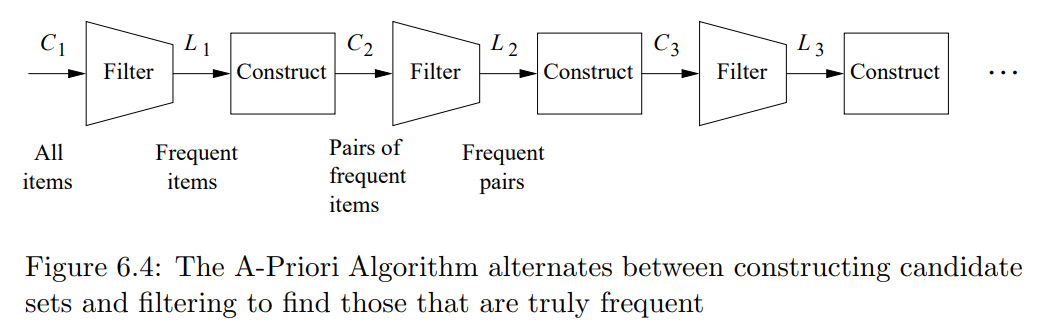

* We start with C1, which is all singleton itemsets, i.e., the items themselves<br>
* The first filter step is to count all items, and those whose counts are at
least the support threshold s form the set L1 of frequent items<br>
* The set C2 of candidate pairs is the set of pairs both of whose items are
in L1<br>
* We then count all the candidate pairs and determine which appear at least
s times. These pairs form L2, the frequent pairs<br>
* The set C3 of candidate
triples is constructed (implicitly) as the set of triples, any two of which is a
pair in L2<br>
* To find L3 we make a third pass through the basket file, count all the cadidate tripletons and determine the frequent tripletons(candidates with support >= s)

### The algorithm

In [10]:
# Auxiliary functions

def all_itemsets_of_size_k(freq_item_sets, k):
    
    # k is the size of each item set

    # return all possible combinations of items(but ensure no repetitions -> 
    # so for k >= 2 we might have overlapping itemsets which is why set of all items in considered)

    if k <= 2: 
        return list(it.combinations(freq_item_sets, k))
    else:
        return list(it.combinations(set(a for b in freq_item_sets for a in b),k))
    
    
def count_items(item_list):
    item_counts = dict()

    for itemset in itemsets:
        int_itemset = [item_to_int_mapping[item] for item in itemset]
        for key in item_list:
            item_counts[key] = item_counts.get(key, 0)
            
            if all(k in int_itemset for k in key):
                item_counts[key] = item_counts.get(key) + 1 
                                       
    return item_counts


def filter_items_not_matching_threshold(C):
    L = dict()
    
    for item in C:
        if(C.get(item) >= threshold):
            L[item] = C.get(item)
        
    return L



# The algorithm

# Step 1. Mapping basket names to integers
item_to_int_mapping = dict()
int_to_item_mapping = dict()

for itemset in itemsets:    
    for item in itemset:
        if(not (item in item_to_int_mapping)):
            item_to_int_mapping[item] = len(item_to_int_mapping)+1
    
int_to_item_mapping = {val: item for (item,val) in item_to_int_mapping.items()}   

print("Item     Int mapping")
print("****     ***********")
for item in item_to_int_mapping.items():
    print("{:<15} {:<10}".format(item[0], item[1]))

# Finding C1 table

C = dict()

for itemset in itemsets:
    for item in itemset:
        C[item_to_int_mapping[item]] = C.get(item_to_int_mapping[item], 0) + 1

print()
print("C1 table")
print("********")
print()

print("Item  Support")
print("****  *******")
for count in C.items():
    print("{:<5} {:<5}".format(count[0], count[1]))
    
# Finding L1 table

L = filter_items_not_matching_threshold(C)

print()
print("L1 table")
print("********")
print()

print("Item  Support")
print("****  *******")

for frequent_singleton in L.items():
    print("{:<5} {:<5}".format(frequent_singleton[0], frequent_singleton[1]))

k = 2

# loop as long as there are frequent itemsets
while L != dict():
    
    if(k == 3):
        # if we are finding frequent tripletons eliminate all pairs with elements which occur in only one pair
        items = dict()
        
        counts = dict()

        for (i,j) in L:
            counts[i] = counts.get(i,0) + 1
            counts[j] = counts.get(j,0) + 1
            
        for (i,j) in L:
            if(counts[i] > 1 and counts[j] > 1):
                items[(i,j)] = L[(i,j)]
                
    else:
        items = list(L)
        
        
    print()

    candidates = all_itemsets_of_size_k(items, k)

    C = count_items(candidates)
    
    if C == dict():
        break
    
    print("C"+str(k)+" table")
    print("********")
    print()

    print("Itemset  Support")
    print("*******  *******")
    for items in C.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))

    L = filter_items_not_matching_threshold(C)

    print()
    print("L"+str(k)+" table")
    print("********")
    print()    

    print("Itemset  Support")
    print("*******  *******")

    for items in L.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))
        
    k += 1

Item     Int mapping
****     ***********
cat             1         
and             2         
dog             3         
bites           4         
yahoo           5         
news            6         
claims          7         
a               8         
mated           9         
with            10        
produced        11        
viable          12        
offspring       13        
killer          14        
likely          15        
is              16        
big             17        
professional    18        
free            19        
advice          20        
on              21        
training        22        
puppy           23        
kitten          24        
behavior        25        
&               26        
provides        27        
in              28        
eugene          29        
oregon          30        
slang           31        
term            32        
used            33        
by              34        
police          35        
officers     

## 2) PCY Algorithm

there may be much unused space in main memory on the first pass of Apriori algorithm. If there
are a million items and gigabytes of main memory, we do not need more than
10% of the main memory for the two tables used – a translation
table from item names to small integers and an array to count those integers.

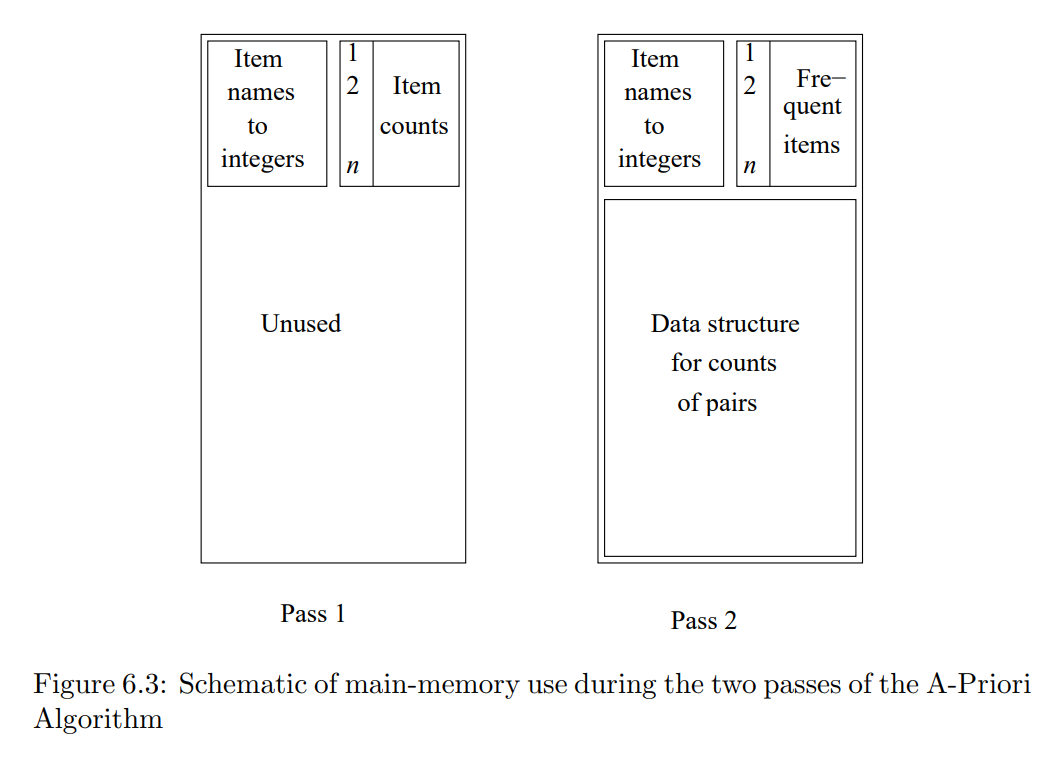

In PCY algorithm, as we examine a basket during
the first pass, we not only add 1 to the count for each item in the basket, but
we generate all the pairs, using a double loop. We hash each pair, and we add
1 to the bucket into which that pair hashes. <br>

At the end of the first pass, each bucket has a count, which is the sum of
the counts of all the pairs that hash to that bucket. If the count of a bucket
is at least as great as the support threshold s, it is called a frequent bucket.
We can say nothing about the pairs that hash to a frequent bucket; they could
all be frequent pairs from the information available to us. But if the count of
the bucket is less than s (an infrequent bucket), we know no pair that hashes
to this bucket can be frequent, even if the pair consists of two frequent items

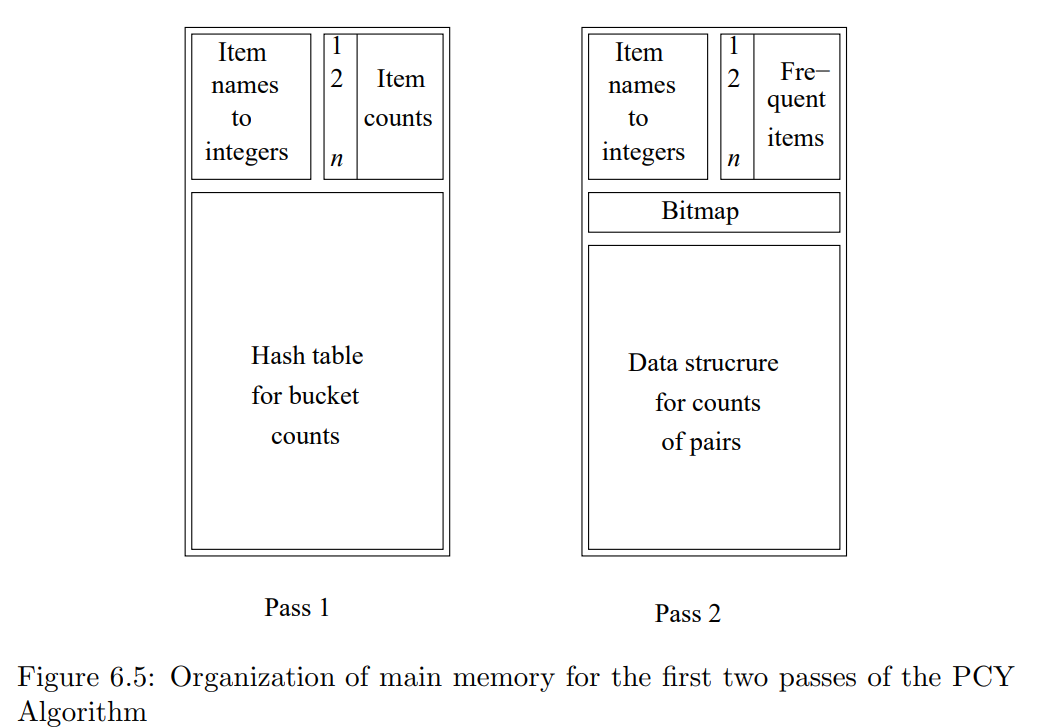

 We can define the set of
candidate pairs C2 to be those pairs {i, j} such that:
1. i and j are frequent items.
2. {i, j} hashes to a frequent bucket.
It is the second condition that distinguishes PCY from A-Priori.

Between the passes of PCY, the hash table is summarized as a bitmap, with
one bit for each bucket. The bit is 1 if the bucket is frequent and 0 if not. Thus
integers of 32 bits are replaced by single bits

While the discovery of frequent pairs by PCY differs significantly from APriori, the later stages, where we find frequent triples and larger sets if desired,
are essentially the same as A-Priori

**Remarks:** There are 45 candidate singletons. So number of possible pairs is nC2 = 45x22=990, so hash table size is chosen as 330(as support threshold is 3)<br>
The hash function used is (a*b)%n where n is hash table size

In [11]:
# Auxiliary functions

def all_itemsets_of_size_k(freq_item_sets, k):
    
    # k is the size of each item set

    # return all possible combinations of items(but ensure no repetitions -> 
    # so for k >= 2 we might have overlapping itemsets which is why set of all items in considered)

    if k <= 2: 
        return list(it.combinations(freq_item_sets, k))
    else:
        return list(it.combinations(set(a for b in freq_item_sets for a in b),k))
    
    
def count_items(item_list):
    item_counts = dict()

    for itemset in itemsets:
        int_itemset = [item_to_int_mapping[item] for item in itemset]
        for key in item_list:
            item_counts[key] = item_counts.get(key, 0)
            
            if all(k in int_itemset for k in key):
                item_counts[key] = item_counts.get(key) + 1 
                                       
    return item_counts


def filter_items_not_matching_threshold(C):
    L = dict()
    
    for item in C:
        if(C.get(item) >= threshold):
            L[item] = C.get(item)
        
    return L



# The algorithm

hash_table_size = 330

def h(a, b):
    return (a*b)%hash_table_size

# Step 1. Mapping basket names to integers
item_to_int_mapping = dict()
int_to_item_mapping = dict()

for itemset in itemsets:    
    for item in itemset:
        if(not (item in item_to_int_mapping)):
            item_to_int_mapping[item] = len(item_to_int_mapping)+1
    
int_to_item_mapping = {val: item for (item,val) in item_to_int_mapping.items()}   

print("Item     Int mapping")
print("****     ***********")
for item in item_to_int_mapping.items():
    print("{:<15} {:<10}".format(item[0], item[1]))

# Finding C1 table

C = dict()
hash_table = [0]*hash_table_size

for itemset in itemsets:
    
    for i in range(len(itemset)):
        
        item1 = itemset[i]
        C[item_to_int_mapping[item1]] = C.get(item_to_int_mapping[item1], 0) + 1
        
        
        for j in range(i+1, len(itemset)):
            
            item2 = itemset[j]
            
            if item1 == item2:
                continue
            bucket1 = h(item_to_int_mapping[item1], item_to_int_mapping[item2])
            hash_table[bucket1] = hash_table[bucket1] + 1

print()
print("C1 table")
print("********")
print()

print("Item  Support")
print("****  *******")
for count in C.items():
    print("{:<5} {:<5}".format(count[0], count[1]))
    
# Finding L1 table

L = filter_items_not_matching_threshold(C)

print()
print("L1 table")
print("********")
print()

print("Item  Support")
print("****  *******")
        
for frequent_singleton in L.items():
    print("{:<5} {:<5}".format(frequent_singleton[0], frequent_singleton[1]))
    
    
bitmap = [1 if hash_table[i] >= threshold else 0 for i in range(hash_table_size)]

print()
print("Hash   Support(for bucket)   Bitmap value")
print("****   ******************    ************")
for i in range(hash_table_size):
    print("{:<10} {:<20} {:<5}".format(i, hash_table[i], bitmap[i]))


k = 2

# loop as long as there are frequent itemsets

while L != dict():
    
    if(k == 3):
        # if we are finding frequent tripletons eliminate all pairs with elements which occur in only one pair
        items = dict()

        counts = dict()

        for (i,j) in L:
            counts[i] = counts.get(i,0) + 1
            counts[j] = counts.get(j,0) + 1
            
        for (i,j) in L:
            if(counts[i] > 1 and counts[j] > 1):
                items[(i,j)] = L[(i,j)]
                
    else:
        items = list(L)
        
        
    print()

    candidates = all_itemsets_of_size_k(items, k)
    
    if(k==2):
        
        # eliminate pairs that do not map to a frequent bucket
        for candidate in candidates:
            bucket = h(candidate[0], candidate[1])
            
            if(bitmap[bucket] == 0):
                candidates.remove(candidate)
                

    C = count_items(candidates)
    
    if C == dict():
        break
    
    print("C"+str(k)+" table")
    print("********")
    print()

    print("Itemset  Support")
    print("*******  *******")
    for items in C.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))

    L = filter_items_not_matching_threshold(C)

    print()
    print("L"+str(k)+" table")
    print("********")
    print()    

    print("Itemset  Support")
    print("*******  *******")

    for items in L.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))
        
    k += 1

Item     Int mapping
****     ***********
cat             1         
and             2         
dog             3         
bites           4         
yahoo           5         
news            6         
claims          7         
a               8         
mated           9         
with            10        
produced        11        
viable          12        
offspring       13        
killer          14        
likely          15        
is              16        
big             17        
professional    18        
free            19        
advice          20        
on              21        
training        22        
puppy           23        
kitten          24        
behavior        25        
&               26        
provides        27        
in              28        
eugene          29        
oregon          30        
slang           31        
term            32        
used            33        
by              34        
police          35        
officers     

**Remarks:** We see that the candidate pair (8, 22) included in C2 table of Apriori algorithm has been eliminated in PCY algorithm

## 3) Multistage algorithm

The multistage Algorithm improves upon PCY by using several successive hash
tables to reduce further the number of candidate pairs. The tradeoff is that
Multistage takes more than two passes to find the frequent pairs

The first pass of Multistage is the same as the first pass of PCY. After that
pass, the frequent buckets are identified and summarized by a bitmap, again
the same as in PCY. But the second pass of Multistage does not count the
candidate pairs. Rather, it uses the available main memory for another hash
table, using another hash function. 

On the second pass of Multistage, we again go through the file of baskets.
There is no need to count the items again, since we have those counts from
the first pass.  During the
second pass, we hash certain pairs of items to buckets of the second hash table.
A pair is hashed only if it meets the two criteria for being counted in the second
pass of PCY; that is, we hash {i, j} if and only if i and j are both frequent,
and the pair hashed to a frequent bucket on the first pass. As a result, the sum
of the counts in the second hash table should be significantly less than the sum
for the first pass.

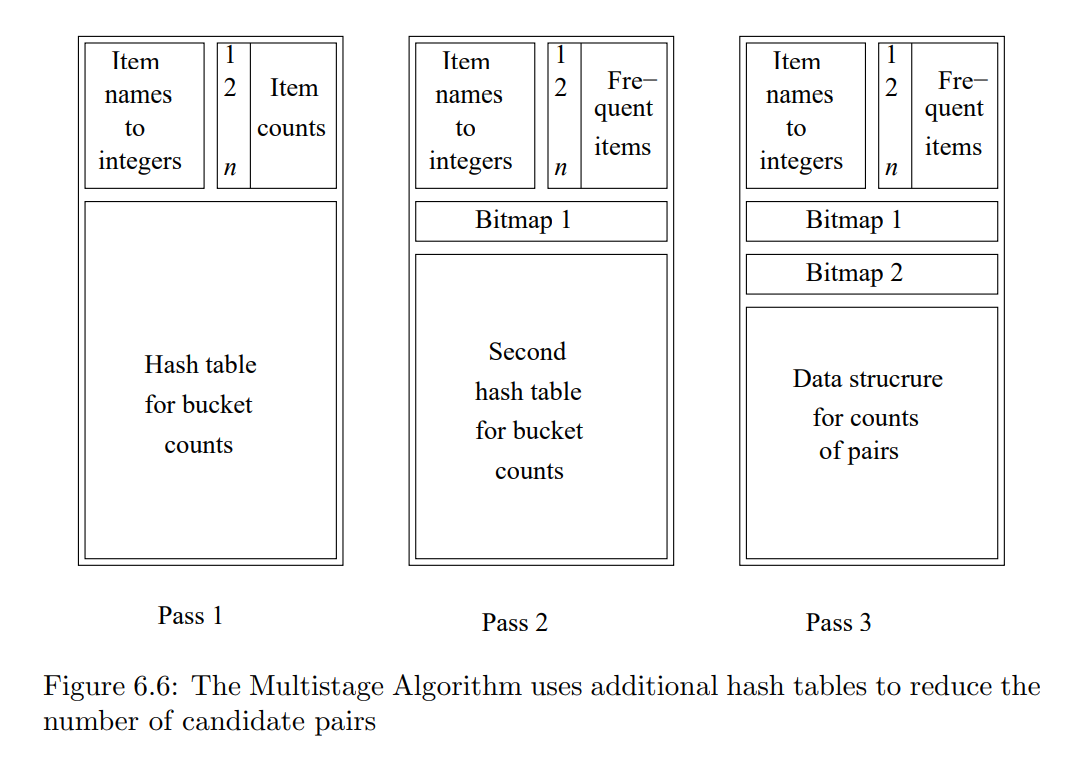

A pair {i, j} is in C2 if
and only if:
1. i and j are both frequent items.
2. {i, j} hashed to a frequent bucket in the first hash table.
3. {i, j} hashed to a frequent bucket in the second hash table.
The third condition is the distinction between Multistage and PCY.

In [12]:
# Auxiliary functions

def all_itemsets_of_size_k(freq_item_sets, k):
    
    # k is the size of each item set

    # return all possible combinations of items(but ensure no repetitions -> 
    # so for k >= 2 we might have overlapping itemsets which is why set of all items in considered)

    if k <= 2: 
        return list(it.combinations(freq_item_sets, k))
    else:
        return list(it.combinations(set(a for b in freq_item_sets for a in b),k))
    
    
def count_items(item_list):
    item_counts = dict()

    for itemset in itemsets:
        int_itemset = [item_to_int_mapping[item] for item in itemset]
        for key in item_list:
            item_counts[key] = item_counts.get(key, 0)
            
            if all(k in int_itemset for k in key):
                item_counts[key] = item_counts.get(key) + 1 
                                       
    return item_counts


def filter_items_not_matching_threshold(C):
    L = dict()
    
    for item in C:
        if(C.get(item) >= threshold):
            L[item] = C.get(item)
        
    return L



# The algorithm

hash_table_1_size = 330
hash_table_2_size = 320 # as 1/32 of the available space is taken up by the bitmap from pass 1

def h1(a, b):
    return (a*b)%hash_table_1_size

def h2(a,b):
    return (a*a + b*b)%hash_table_2_size


# Step 1. Mapping basket names to integers
item_to_int_mapping = dict()
int_to_item_mapping = dict()

for itemset in itemsets:    
    for item in itemset:
        if(not (item in item_to_int_mapping)):
            item_to_int_mapping[item] = len(item_to_int_mapping)+1
    
int_to_item_mapping = {val: item for (item,val) in item_to_int_mapping.items()}   

print("Item     Int mapping")
print("****     ***********")
for item in item_to_int_mapping.items():
    print("{:<15} {:<10}".format(item[0], item[1]))

# Finding C1 table

C = dict()
hash_table_1 = [0]*hash_table_1_size

for itemset in itemsets:
    
    for i in range(len(itemset)):
        
        item1 = itemset[i]
        C[item_to_int_mapping[item1]] = C.get(item_to_int_mapping[item1], 0) + 1
        
        for j in range(i+1, len(itemset)):
            
            item2 = itemset[j]
            
            if item1 == item2:
                continue
                
            bucket1 = h1(item_to_int_mapping[item1], item_to_int_mapping[item2])
            hash_table_1[bucket1] = hash_table_1[bucket1] + 1
            

print()
print("C1 table")
print("********")
print()

print("Item  Support")
print("****  *******")
for count in C.items():
    print("{:<5} {:<5}".format(count[0], count[1]))
    
# Finding L1 table

L = filter_items_not_matching_threshold(C)

print()
print("L1 table")
print("********")
print()
        
print("Item  Support")
print("****  *******")

for frequent_singleton in L.items():
    print("{:<5} {:<5}".format(frequent_singleton[0], frequent_singleton[1]))
    
    
bitmap_1 = [1 if hash_table[i] >= threshold else 0 for i in range(hash_table_1_size)]

print()
print("Hash 1   Support(for bucket)   Bitmap value")
print("******   ******************    ************")
for i in range(hash_table_1_size):
    print("{:<12} {:<20} {:<5}".format(i, hash_table_1[i], bitmap_1[i]))
    
    
# Intermediate pass for filling up second hash table

hash_table_2 = [0]*hash_table_2_size

items = list(L)

print()
index = 0
for itemset in itemsets:
    index += 1
    
    for i in range(len(itemset)):
    
        item1 = item_to_int_mapping[itemset[i]]
        
        for j in range(i+1, len(itemset)):
            
            item2 = item_to_int_mapping[itemset[j]]
            
            bucket1 = h1(item1, item2)
            
            if item1 in L and item2 in L and bitmap_1[bucket1] == 1: 
                bucket2 = h2(item1, item2)
                # print(index, item1, item2, bucket2)
                hash_table_2[bucket2] = hash_table_2[bucket2] + 1
                
# generating bit map for hash table 2
bitmap_2 = [1 if hash_table_2[i] >= threshold else 0 for i in range(hash_table_2_size)]

print()
print("Hash 2  Support(for bucket)   Bitmap value")
print("******  *******************   ************")
for i in range(hash_table_2_size):
    print("{:<12} {:<20} {:<5}".format(i, hash_table_2[i], bitmap_2[i]))


k = 2

# loop as long as there are frequent itemsets

while L != dict():
    
    if(k == 3):
        # if we are finding frequent tripletons eliminate all pairs with elements which occur in only one pair
        items = dict()

        counts = dict()

        for (i,j) in L:
            counts[i] = counts.get(i,0) + 1
            counts[j] = counts.get(j,0) + 1
            
        for (i,j) in L:
            if(counts[i] > 1 and counts[j] > 1):
                items[(i,j)] = L[(i,j)]
                
    else:
        items = list(L)
        
        
    print()

    candidates = all_itemsets_of_size_k(items, k)
    
    if(k==2):
        
        # eliminate pairs that do not map to a frequent bucket in any of the hash tables
        for candidate in candidates:
            bucket1 = h1(candidate[0], candidate[1])
            bucket2 = h2(candidate[0], candidate[1])
            
            if(bitmap_1[bucket1] == 0 or bitmap_2[bucket2] == 0):
                candidates.remove(candidate)
                

    C = count_items(candidates)
    
    if C == dict():
        break
    
    print("C"+str(k)+" table")
    print("********")
    print()

    print("Itemset  Support")
    print("*******  *******")
    for items in C.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))

    L = filter_items_not_matching_threshold(C)

    print()
    print("L"+str(k)+" table")
    print("********")
    print()    

    print("Itemset  Support")
    print("*******  *******")

    for items in L.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))
        
    k += 1

Item     Int mapping
****     ***********
cat             1         
and             2         
dog             3         
bites           4         
yahoo           5         
news            6         
claims          7         
a               8         
mated           9         
with            10        
produced        11        
viable          12        
offspring       13        
killer          14        
likely          15        
is              16        
big             17        
professional    18        
free            19        
advice          20        
on              21        
training        22        
puppy           23        
kitten          24        
behavior        25        
&               26        
provides        27        
in              28        
eugene          29        
oregon          30        
slang           31        
term            32        
used            33        
by              34        
police          35        
officers     

**Remarks:** We see that the candidate pair (1,22) and (2,22) produced in PCY algorithm has been eliminated in Multistage algorithm

## 4. Multihash algorithm

Sometimes, we can get most of the benefit of the extra passes of the Multistage
Algorithm in a single pass. This variation of PCY is called the Multihash
Algorithm. Instead of using two different hash tables on two successive passes,
use two hash functions and two separate hash tables that share main memory
on the first pass,

The danger of using two hash tables on one pass is that each hash table has
half as many buckets as the one large hash table of PCY. As long as the average
count of a bucket for PCY is much lower than the support threshold, we can
operate two half-sized hash tables and still expect most of the buckets of both
hash tables to be infrequent. Thus, in this situation we might well choose the
multihash approach.

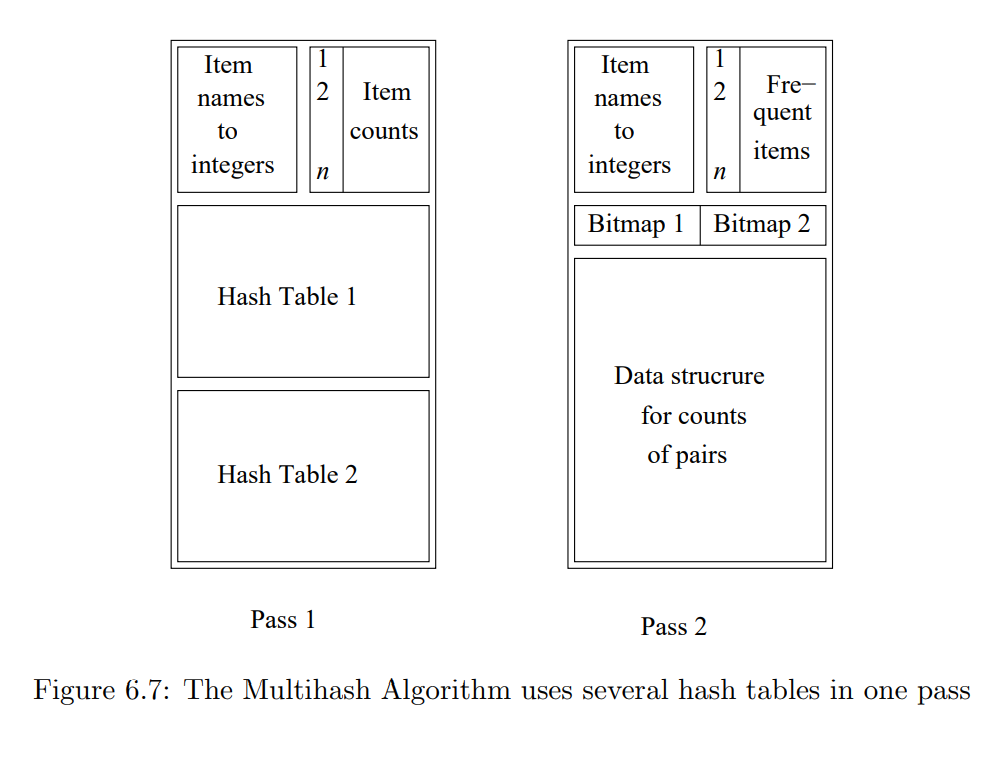

 The conditions for a pair {i, j} to be in C2, and thus
to require a count on the second pass, are the same as for the third pass of
Multistage: i and j must both be frequent, and the pair must have hashed to
a frequent bucket according to both hash tables.

**Note:** Since the two hash tables are used in the same pass, they share the available memory space and the size of the hash tables have been reduced

In [13]:
# Auxiliary functions

def all_itemsets_of_size_k(freq_item_sets, k):
    
    # k is the size of each item set

    # return all possible combinations of items(but ensure no repetitions -> 
    # so for k >= 2 we might have overlapping itemsets which is why set of all items in considered)

    if k <= 2: 
        return list(it.combinations(freq_item_sets, k))
    else:
        return list(it.combinations(set(a for b in freq_item_sets for a in b),k))
    
    
def count_items(item_list):
    item_counts = dict()

    for itemset in itemsets:
        int_itemset = [item_to_int_mapping[item] for item in itemset]
        for key in item_list:
            item_counts[key] = item_counts.get(key, 0)
            
            if all(k in int_itemset for k in key):
                item_counts[key] = item_counts.get(key) + 1 
                                       
    return item_counts


def filter_items_not_matching_threshold(C):
    L = dict()
    
    for item in C:
        if(C.get(item) >= threshold):
            L[item] = C.get(item)
        
    return L



# The algorithm

hash_table_1_size = 200
hash_table_2_size = 200 # as 1/32 of the available space is taken up by the bitmap from pass 1

def h1(a, b):
    return (a*b)%hash_table_1_size

def h2(a,b):
    return (a*a + b*b)%hash_table_2_size


# Step 1. Mapping basket names to integers
item_to_int_mapping = dict()
int_to_item_mapping = dict()

for itemset in itemsets:    
    for item in itemset:
        if(not (item in item_to_int_mapping)):
            item_to_int_mapping[item] = len(item_to_int_mapping)+1
    
int_to_item_mapping = {val: item for (item,val) in item_to_int_mapping.items()}   

print("Item     Int mapping")
print("****     ***********")
for item in item_to_int_mapping.items():
    print("{:<15} {:<10}".format(item[0], item[1]))

# Finding C1 table

C = dict()
hash_table_1 = [0]*hash_table_1_size

for itemset in itemsets:
    
    for i in range(len(itemset)):
        
        item1 = itemset[i]
        C[item_to_int_mapping[item1]] = C.get(item_to_int_mapping[item1], 0) + 1
        
        for j in range(i+1, len(itemset)):
            
            item2 = itemset[j]
            
            if item1 == item2:
                continue
                
            # build 2 hash tables instead of one
            bucket1 = h1(item_to_int_mapping[item1], item_to_int_mapping[item2])
            bucket2 = h2(item_to_int_mapping[item1], item_to_int_mapping[item2])
            hash_table_1[bucket1] = hash_table_1[bucket1] + 1
            hash_table_2[bucket2] = hash_table_2[bucket2] + 1
            

print()
print("C1 table")
print("********")
print()

print("Item  Support")
print("****  *******")
for count in C.items():
    print("{:<5} {:<5}".format(count[0], count[1]))
    
# Finding L1 table

L = filter_items_not_matching_threshold(C)

print()
print("L1 table")
print("********")
print()
        
print("Item  Support")
print("****  *******")

for frequent_singleton in L.items():
    print("{:<5} {:<5}".format(frequent_singleton[0], frequent_singleton[1]))
    
    
bitmap_1 = [1 if hash_table[i] >= threshold else 0 for i in range(hash_table_1_size)]

print()
print("Hash 1   Support(for bucket)   Bitmap value")
print("******   ******************    ************")
for i in range(hash_table_1_size):
    print("{:<12} {:<20} {:<5}".format(i, hash_table_1[i], bitmap_1[i]))
    
                
# generating bit map for hash table 2
bitmap_2 = [1 if hash_table_2[i] >= threshold else 0 for i in range(hash_table_2_size)]

print()
print("Hash 2  Support(for bucket)   Bitmap value")
print("******  *******************   ************")
for i in range(hash_table_2_size):
    print("{:<12} {:<20} {:<5}".format(i, hash_table_2[i], bitmap_2[i]))


k = 2

# loop as long as there are frequent itemsets

while L != dict():
    
    if(k == 3):
        # if we are finding frequent tripletons eliminate all pairs with elements which occur in only one pair
        items = dict()

        counts = dict()

        for (i,j) in L:
            counts[i] = counts.get(i,0) + 1
            counts[j] = counts.get(j,0) + 1
            
        for (i,j) in L:
            if(counts[i] > 1 and counts[j] > 1):
                items[(i,j)] = L[(i,j)]
                
    else:
        items = list(L)
        
        
    print()

    candidates = all_itemsets_of_size_k(items, k)
    
    if(k==2):
        
        # eliminate pairs that do not map to a frequent bucket in any of the hash tables
        for candidate in candidates:
            bucket1 = h1(candidate[0], candidate[1])
            bucket2 = h2(candidate[0], candidate[1])
            
            if(bitmap_1[bucket1] == 0 or bitmap_2[bucket2] == 0):
                candidates.remove(candidate)
                

    C = count_items(candidates)
    
    if C == dict():
        break
    
    print("C"+str(k)+" table")
    print("********")
    print()

    print("Itemset  Support")
    print("*******  *******")
    for items in C.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))

    L = filter_items_not_matching_threshold(C)

    print()
    print("L"+str(k)+" table")
    print("********")
    print()    

    print("Itemset  Support")
    print("*******  *******")

    for items in L.items():
        print("{:<10} {:<10}".format(str(items[0]), items[1]))
        
    k += 1

Item     Int mapping
****     ***********
cat             1         
and             2         
dog             3         
bites           4         
yahoo           5         
news            6         
claims          7         
a               8         
mated           9         
with            10        
produced        11        
viable          12        
offspring       13        
killer          14        
likely          15        
is              16        
big             17        
professional    18        
free            19        
advice          20        
on              21        
training        22        
puppy           23        
kitten          24        
behavior        25        
&               26        
provides        27        
in              28        
eugene          29        
oregon          30        
slang           31        
term            32        
used            33        
by              34        
police          35        
officers     

**Remarks:** The candidate pair (8,22) has been eliminated though the sigletons 8 and 22 are both frequent. However, the results are not as good as Multistage algorithm because in multihash algorithm the 2 hash tables are built independently however, in multistage, we map an element to hash table 2 only if it is mapped to a frequent bucket in hash table 1. But multihash algorithm is faster than multistage algorithm.